In [1]:
%matplotlib inline

In [2]:
from ndreg import *
import matplotlib
import ndio.remote.neurodata as neurodata
import nibabel as nb
import numpy as np

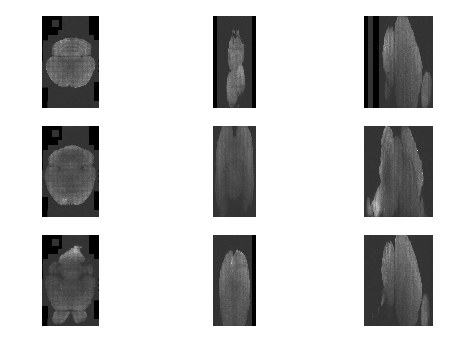

In [5]:
inToken = "Aut1374"
inImg = imgDownload(inToken, resolution=5)
imgShow(inImg, vmax=500)

In [6]:
data_copy = imgCopy(inImg)
print type(inImg)
print type(data_copy)

<class 'SimpleITK.SimpleITK.Image'>
<class 'SimpleITK.SimpleITK.Image'>


In [7]:
data = np.genfromtxt('Aut1374localeq.40000.brightest.csv', dtype=int, delimiter=',', usecols = (0,1,2), names=['x','y','z'])

In [15]:
data_copy = data
data_a = data_copy['x']
data_b = data_copy['y']
data_c = data_copy['z']

In [16]:
print len(data['x'])

40000


In [17]:
print data_a

[ 37  37  38 ..., 519 519 522]


In [18]:
import numpy

data_a = numpy.append(data_a, data_copy['x']+1)
data_b = numpy.append(data_b, data_copy['y']+0)
data_c = numpy.append(data_c, data_copy['z']+0)  

"\ndata_a = numpy.append(data_a, data_copy['x']+0)\ndata_b = numpy.append(data_b, data_copy['y']+1)\ndata_c = numpy.append(data_c, data_copy['z']+0)   \n\ndata_a = numpy.append(data_a, data_copy['x']+0)\ndata_b = numpy.append(data_b, data_copy['y']+0)\ndata_c = numpy.append(data_c, data_copy['z']+1)\n\ndata_a = numpy.append(data_a, data_copy['x']-1)\ndata_b = numpy.append(data_b, data_copy['y']+0)\ndata_c = numpy.append(data_c, data_copy['z']+0)\n\ndata_a = numpy.append(data_a, data_copy['x']+0)\ndata_b = numpy.append(data_b, data_copy['y']-1)\ndata_c = numpy.append(data_c, data_copy['z']+0)   \n\ndata_a = numpy.append(data_a, data_copy['x']+0)\ndata_b = numpy.append(data_b, data_copy['y']+0)\ndata_c = numpy.append(data_c, data_copy['z']-1)\n"

In [19]:
print len(data_a)

80000


In [20]:
data_a = numpy.append(data_a, data_copy['x']+0)
data_b = numpy.append(data_b, data_copy['y']+1)
data_c = numpy.append(data_c, data_copy['z']+0)
print len(data_a)

120000


In [21]:
data_a = numpy.append(data_a, data_copy['x']+0)
data_b = numpy.append(data_b, data_copy['y']+0)
data_c = numpy.append(data_c, data_copy['z']+1)
print len(data_a)

160000


In [22]:
data_a = numpy.append(data_a, data_copy['x']-1)
data_b = numpy.append(data_b, data_copy['y']+0)
data_c = numpy.append(data_c, data_copy['z']+0)
print len(data_a)

200000


In [23]:
data_a = numpy.append(data_a, data_copy['x']+0)
data_b = numpy.append(data_b, data_copy['y']-1)
data_c = numpy.append(data_c, data_copy['z']+0)  
print len(data_a)

240000


In [24]:
data_a = numpy.append(data_a, data_copy['x']+0)
data_b = numpy.append(data_b, data_copy['y']+0)
data_c = numpy.append(data_c, data_copy['z']-1)
print len(data_a)

280000


In [25]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly import tools
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

In [26]:
trace1 = go.Scatter3d(
            x = data_a,
            y = data_b,
            z = data_c,
            mode='markers',
            marker=dict(
                size=1.2,
                color='purple',                # set color to an array/list of desired values
                colorscale='Viridis',   # choose a colorscale
                opacity=0.15
            )
        )

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

In [27]:
final_data = numpy.concatenate([data_a.T, data_b.T, data_c.T])

In [28]:
final_data = numpy.vstack((data_a, data_b, data_c))
print final_data.shape
final_data = numpy.transpose(final_data)
print final_data.shape

(3, 280000)
(280000, 3)


In [29]:
xList = []
yList = []
zList = []
for l in final_data:
    xList.append(l[0])
    yList.append(l[1])
    zList.append(l[2])

In [30]:
data_test = imgCopy(inImg)

In [31]:
# Sanity check
print data_test.GetSize()
print type(data_test)

(551, 894, 1206)
<class 'SimpleITK.SimpleITK.Image'>


In [35]:
print data_test.GetPixel(82, 91, 209)
print data_test.GetPixel(250, 250, 1000)
print data_test.GetPixel(501, 141, 700)

0
197
0


In [37]:
print data_test.GetSize()[0]

551


In [40]:
## We can arbitrarly set any value inside data_test.  Thus, to create a channel
## to upload, we set everything inside to zero.
for i in range(data_test.GetSize()[0]):
    print i
    for j in range(data_test.GetSize()[1]):
        for k in range(data_test.GetSize()[2]):
            data_test[i, j, k] = 0

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [41]:
## Write data_test to save
imgWrite(data_test, 'Aut1374_zeros.nii')

In [44]:
abc = 1;
print type(abc)

<type 'int'>


In [45]:
## Now that everything is zero, set the brightest points from XList, YList, ZList to new colors, and upload
# as an annotation channel.
invalidLines = [];
counter = 1;
for i in range(len(xList)):
    try:
        data_test[int(xList[i]), int(yList[i]), int(zList[i])] = 254;
        counter = counter + 1;
    except IndexError:
        invalidLines.append(l)

In [46]:
print invalidLines

[]


In [47]:
print data_test

Image (0x9222cb0)
  RTTI typeinfo:   itk::Image<unsigned short, 3u>
  Reference Count: 1
  Modified Time: 1702
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [551, 894, 1206]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [551, 894, 1206]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [551, 894, 1206]
  Spacing: [0.01872, 0.01872, 0.005]
  Origin: [0, 0, 0]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.01872 0 0
0 0.01872 0
0 0 0.005

  PointToIndexMatrix: 
53.4188 0 0
0 53.4188 0
0 0 200

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x8faa040)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, unsigned short>
      Reference 

In [52]:
print data_test[284, 180, 992]

254


In [48]:
## all as one brightness value
## annotation channel
## nothing shows up

imgUpload(channel='testing_bright_points',token='bright_points', img=data_test)  

In [49]:
## all as one brightness value
## uint8
## nothing shows up?

imgUpload(channel = 'thingy', token = 'bright_points', img = data_test)